# Ipl First Inning run prediction

In [1]:
# Importing essential libraries
import pandas as pd
import pickle
import numpy as np

from matplotlib import pyplot as plt 

import seaborn as sns 

In [2]:
# Loading the dataset
df = pd.read_csv('../dataset/ipl.csv')

In [3]:
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [4]:
# --- Data Cleaning ---
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [5]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [6]:
df['bat_team'] = df['bat_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
df['bowl_team'] = df['bowl_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')

df['bat_team'] = df['bat_team'].str.replace('Deccan Chargers', 'Sunrises Hyderabad')
df['bowl_team'] = df['bowl_team'].str.replace('Deccan Chargers', 'Sunrises Hyderabad')

df['bat_team'] = df['bat_team'].str.replace('Gujarat Lions', 'Gujarat Titans')
df['bowl_team'] = df['bowl_team'].str.replace('Gujarat Lions', 'Gujarat Titans')

df['bat_team'] = df['bat_team'].str.replace('Rising Pune Supergiants', 'Lucknow Super Giants')
df['bowl_team'] = df['bowl_team'].str.replace('Rising Pune Supergiants', 'Lucknow Super Giants')


In [7]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrises Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Lucknow Super Giants', 'Gujarat Titans', 'Rising Pune Supergiant'],
      dtype=object)

In [8]:
# Keeping only consistent teams
consistent_teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Gujarat Titans',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Lucknow Super Giants'
]

In [9]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [10]:
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


In [11]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

In [12]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [13]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Capitals' 'Sunrisers Hyderabad' 'Lucknow Super Giants'
 'Gujarat Titans']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Capitals'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad' 'Lucknow Super Giants'
 'Gujarat Titans']


In [14]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

C:\Users\sachin kumar ray\AppData\Local\Temp\ipykernel_3864\486738173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))


In [15]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [16]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Gujarat Titans,...,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Gujarat Titans,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Lucknow Super Giants,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Capitals',
       'bat_team_Gujarat Titans', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Lucknow Super Giants',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Capitals',
       'bowl_team_Gujarat Titans', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Lucknow Super Giants',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [18]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Capitals', 'bat_team_Gujarat Titans', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Lucknow Super Giants', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Capitals', 'bowl_team_Gujarat Titans', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Lucknow Super Giants', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [19]:
# Rename columns
encoded_df.columns = ['date', 'bat_team_Chennai_Super_Kings', 'bat_team_Delhi_Capitals', 'bat_team_Gujarat_Titans',
       'bat_team_Kings_XI_Punjab', 'bat_team_Kolkata_Knight_Riders', 'bat_team_Lucknow_Super_Giants',
       'bat_team_Mumbai_Indians', 'bat_team_Rajasthan_Royals',
       'bat_team_Royal_Challengers_Bangalore', 'bat_team_Sunrisers_Hyderabad',
       'bowl_team_Chennai_Super_Kings', 'bowl_team_Delhi_Capitals', 'bowl_team_Gujarat_Titans',
       'bowl_team_Kings_XI_Punjab', 'bowl_team_Kolkata_Knight_Riders', 'bowl_team_Lucknow_Super_Giants',
       'bowl_team_Mumbai_Indians', 'bowl_team_Rajasthan_Royals',
       'bowl_team_Royal_Challengers_Bangalore',
       'bowl_team_Sunrisers_Hyderabad', 'overs', 'runs', 'wickets',
       'runs_last_5', 'wickets_last_5', 'total']

In [20]:
encoded_df

,date,bat_team_Chennai_Super_Kings,bat_team_Delhi_Capitals,bat_team_Gujarat_Titans,bat_team_Kings_XI_Punjab,bat_team_Kolkata_Knight_Riders,bat_team_Lucknow_Super_Giants,bat_team_Mumbai_Indians,bat_team_Rajasthan_Royals,bat_team_Royal_Challengers_Bangalore,...,bowl_team_Mumbai_Indians,bowl_team_Rajasthan_Royals,bowl_team_Royal_Challengers_Bangalore,bowl_team_Sunrisers_Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,0,1,0,0,0,0,...,0,0,1,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,0,1,0,0,0,0,...,0,0,1,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,0,1,0,0,0,0,...,0,0,1,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,0,1,0,0,0,0,...,0,0,1,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,0,1,0,0,0,0,...,0,0,1,0,5.5,61,1,58,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,0,0,0,0,1,0,0,0,0,...,1,0,0,0,18.1,106,9,29,4,107
75885,2017-05-19,0,0,0,0,1,0,0,0,0,...,1,0,0,0,18.2,107,9,29,4,107
75886,2017-05-19,0,0,0,0,1,0,0,0,0,...,1,0,0,0,18.3,107,9,28,4,107
75887,2017-05-19,0,0,0,0,1,0,0,0,0,...,1,0,0,0,18.4,107,9,24,4,107


In [21]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

In [22]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [23]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [24]:
X_train

,bat_team_Chennai_Super_Kings,bat_team_Delhi_Capitals,bat_team_Gujarat_Titans,bat_team_Kings_XI_Punjab,bat_team_Kolkata_Knight_Riders,bat_team_Lucknow_Super_Giants,bat_team_Mumbai_Indians,bat_team_Rajasthan_Royals,bat_team_Royal_Challengers_Bangalore,bat_team_Sunrisers_Hyderabad,...,bowl_team_Lucknow_Super_Giants,bowl_team_Mumbai_Indians,bowl_team_Rajasthan_Royals,bowl_team_Royal_Challengers_Bangalore,bowl_team_Sunrisers_Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
32,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.1,61,0,59,0
33,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.2,61,1,59,1
34,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.3,61,1,59,1
35,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.4,61,1,59,1
36,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.5,61,1,58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,19.2,194,7,54,4
68858,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,19.3,200,7,56,4
68859,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,19.4,201,7,56,4
68860,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,19.5,202,7,57,4


In [25]:
y_train

array([222, 222, 222, ..., 208, 208, 208], dtype=int64)

In [26]:
y_test

array([207, 207, 207, ..., 107, 107, 107], dtype=int64)

**One-Hot-Encoding**

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [28]:
# trf = ColumnTransformer([
#     ('trf', OneHotEncoder(sparse = False, drop = 'first'), ['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Capitals', 'bat_team_Kings XI Punjab',
#               'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
#               'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
#               'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Capitals', 'bowl_team_Kings XI Punjab',
#               'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
#               'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
#               'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total'])
# ], remainder = 'passthrough')

# --- Model Building ---
# Linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


In [30]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [31]:
# pipe = Pipeline(steps = [
#     ('step1', trf),
#     ('step2', LinearRegression())
# ])

In [32]:
# pipe.fit(X_train,y_train)

In [33]:
pred = regressor.predict(X_test)

In [34]:
pred

array([172.25345288, 175.42084361, 174.78783414, ..., 100.8090797 ,
       100.16359499,  93.60084579])

**Convert pred into data frame**

In [35]:
actual_value = y_test

In [36]:
actual_value

array([207, 207, 207, ..., 107, 107, 107], dtype=int64)

In [37]:
prediction1 = pd.DataFrame(pred)
actual_value = pd.DataFrame(actual_value)

In [38]:
prediction1

,0
0,172.253453
1,175.420844
2,174.787834
3,177.955225
4,181.116378
...,...
3875,101.115642
3876,101.435852
3877,100.809080
3878,100.163595


In [39]:
actual_value

,0
0,207
1,207
2,207
3,207
4,207
...,...
3875,107
3876,107
3877,107
3878,107


**Concatenate actual_value and prediction1**

In [40]:
frame1 = [actual_value, prediction1]

In [41]:
result1 = pd.concat(frame1, axis=1, join='inner')

In [42]:
result1.columns = ['actual_value', 'prediction1']

In [43]:
result1

,actual_value,prediction1
0,207,172.253453
1,207,175.420844
2,207,174.787834
3,207,177.955225
4,207,181.116378
...,...,...
3875,107,101.115642
3876,107,101.435852
3877,107,100.809080
3878,107,100.163595


In [44]:
regressor.predict(X_test)[250]

174.18118748713826

In [45]:
from sklearn import metrics
import numpy as np
mae_value = metrics.mean_absolute_error(y_test, pred)
mse_value = metrics.mean_squared_error(y_test, pred)
rmse_value = np.sqrt(metrics.mean_squared_error(y_test, pred))

In [46]:
print('MAE:', mae_value)
print('MSE:', mse_value)
print('RMSE:', rmse_value)

MAE: 12.312732680652855
MSE: 257.5067665759122
RMSE: 16.04701737320404


In [47]:
mae_value

12.312732680652855

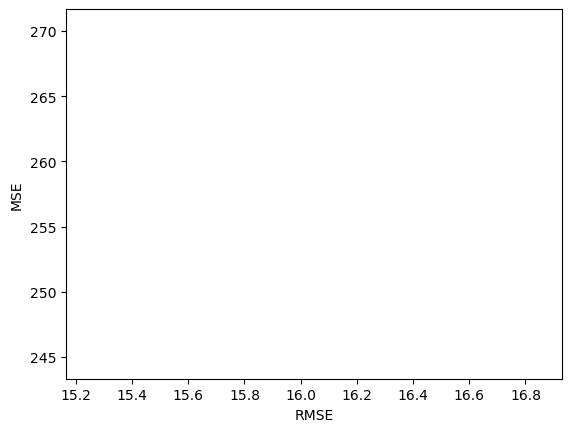

In [48]:
plt.plot([rmse_value], [mse_value])
plt.xlabel('RMSE')
plt.ylabel('MSE')
plt.show()

**Plotting graph of linear regression**

In [49]:
train_y = pd.DataFrame(y_train)

In [50]:
train_y

,0
0,222
1,222
2,222
3,222
4,222
...,...
39653,208
39654,208
39655,208
39656,208


In [51]:
# X_test

In [52]:
# y_test

In [53]:
# test_y = pd.DataFrame(y_test)

In [54]:
# test_y

In [55]:
c = regressor.intercept_

In [56]:
c

164.38402206102052

In [57]:
m = regressor.coef_

In [58]:
m

array([ 1.96697354, -1.33887806, -1.84444089,  0.96507993, -2.15920919,
       -4.91068425,  3.58849056, -2.91159463,  5.55188305,  1.09237993,
       -0.29486742,  0.2787703 ,  5.26241199,  0.9727787 , -3.48170619,
       -1.72882091, -0.42057937, -0.16543853,  0.82408762, -1.24663617,
       -6.20534235,  0.94074362, -4.90554007,  0.00623762, -1.03043728])

**Prediction on training dataset**

In [59]:
y_pred_train = regressor.predict(X_train)

In [60]:
y_pred_train

array([189.15503497, 182.59852339, 181.97798915, ..., 196.89509327,
       197.22154028, 202.27665588])

**With training data**

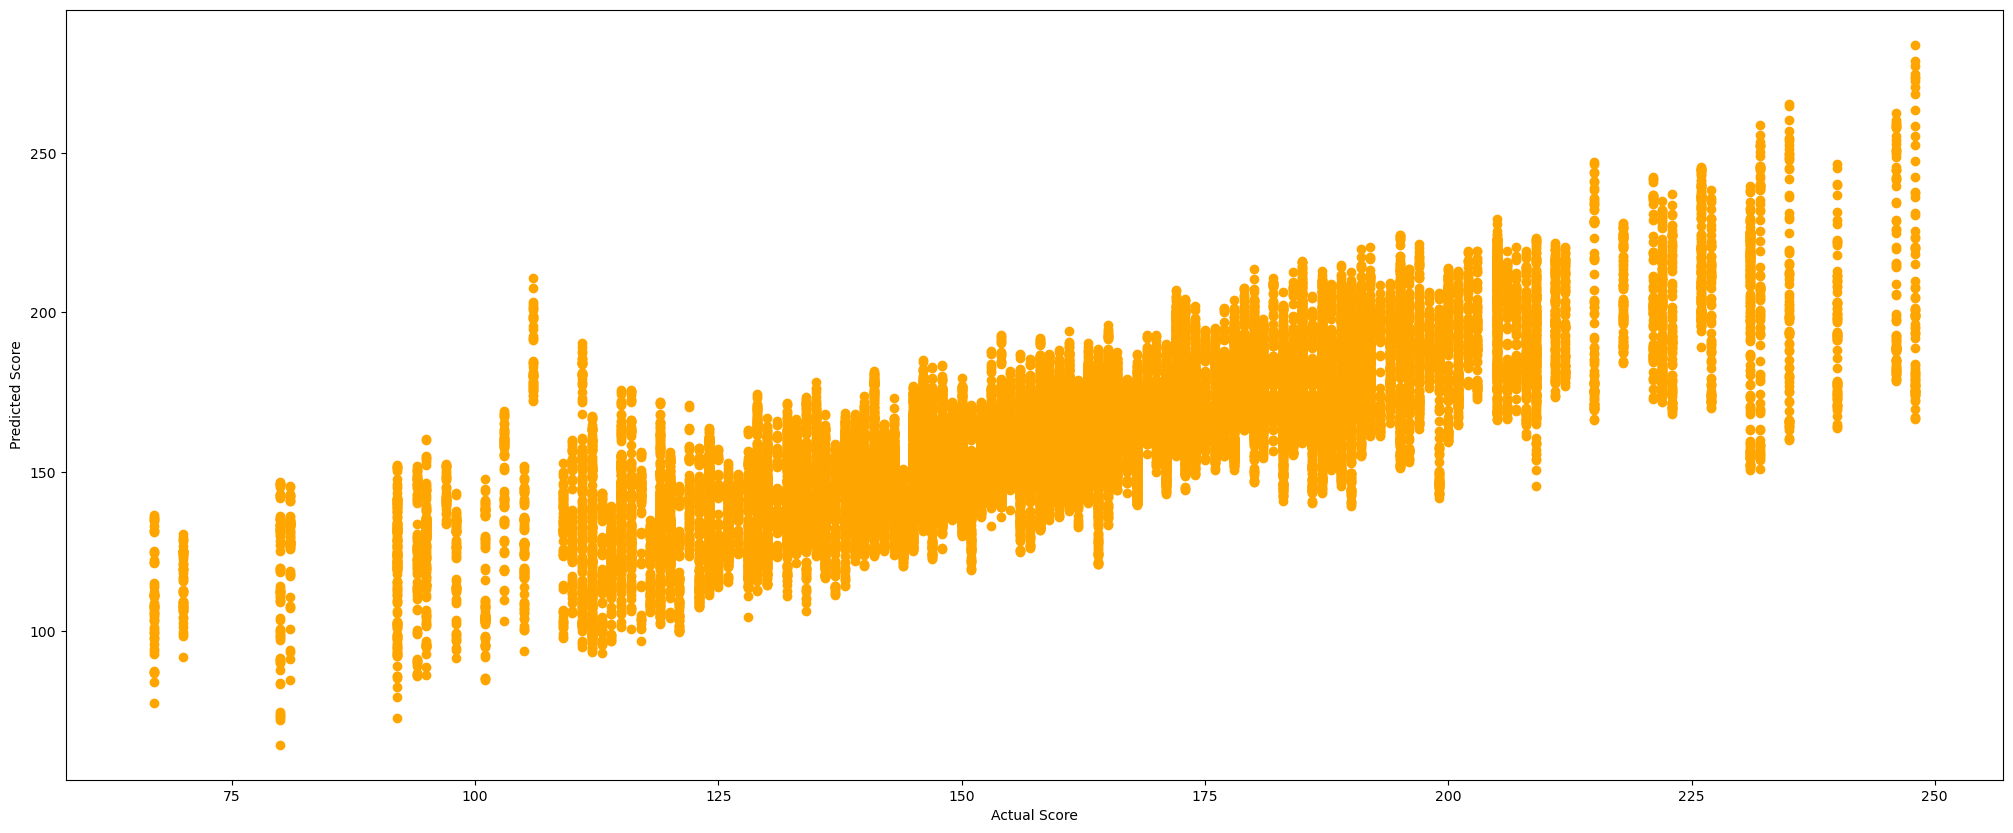

In [61]:
plt.figure(figsize = (25, 10))
plt.scatter(y_train, y_pred_train, color = 'orange')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.show()

In [62]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.6459187640717206

**With Testing dataset**

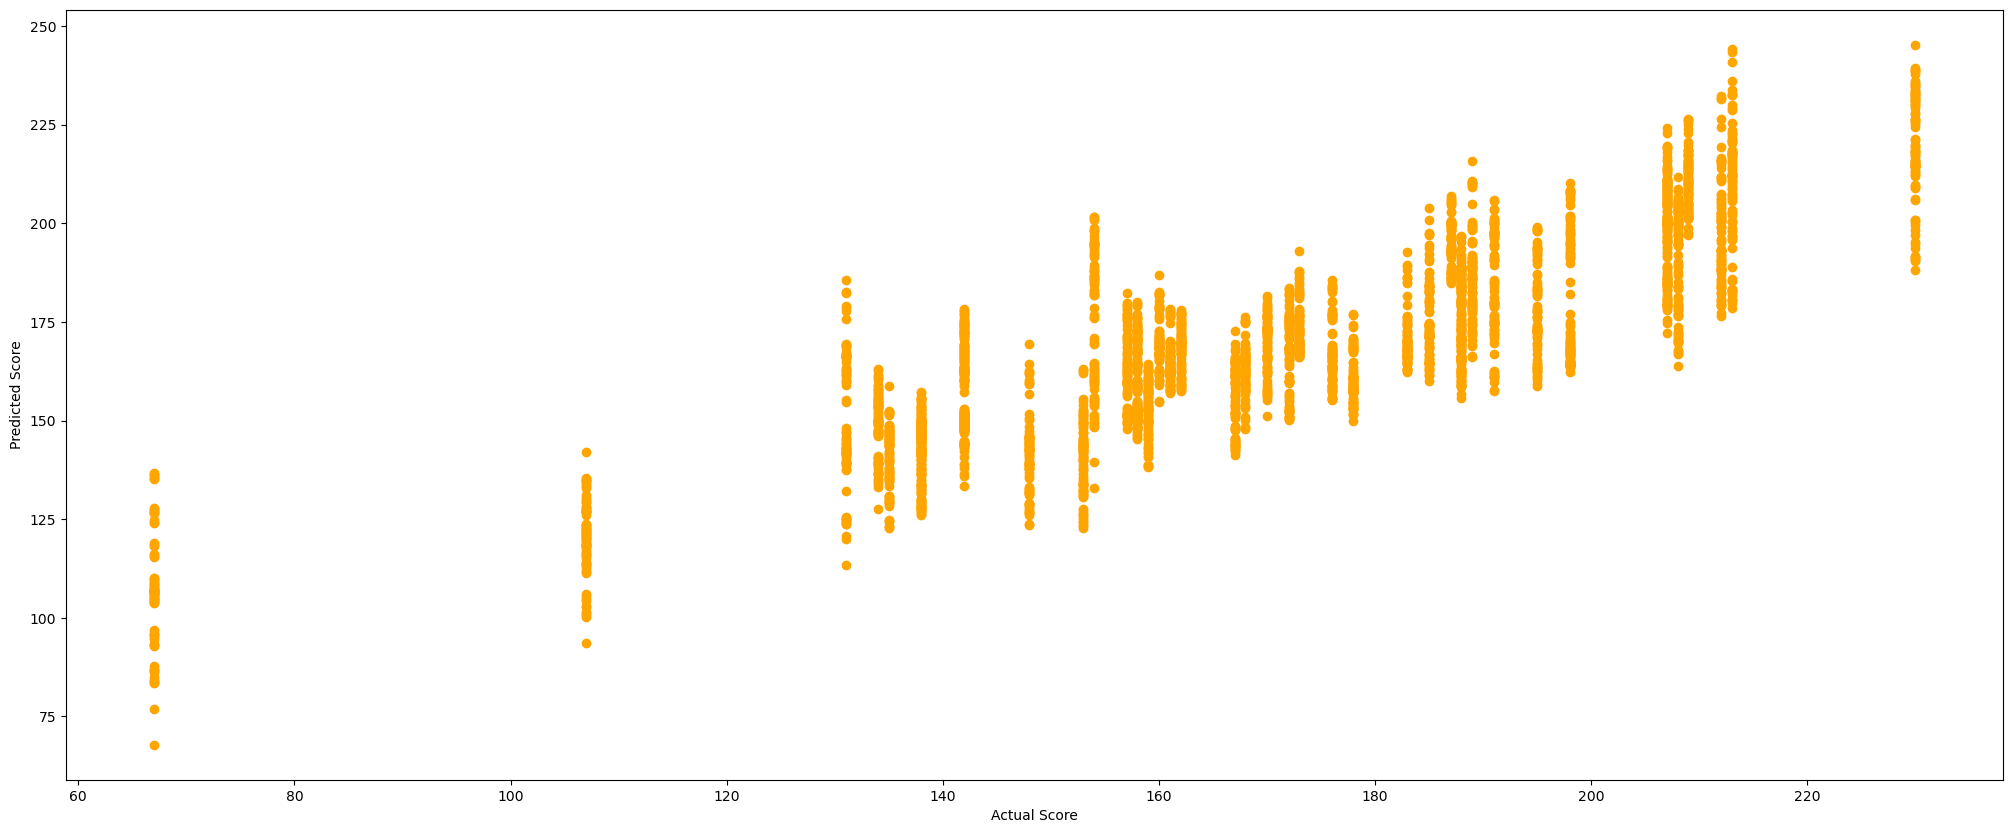

In [63]:
plt.figure(figsize = (25, 10))
plt.scatter(y_test, pred, color = 'orange')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.show()

**Plotting on the same graph (testing and training comparasion)**

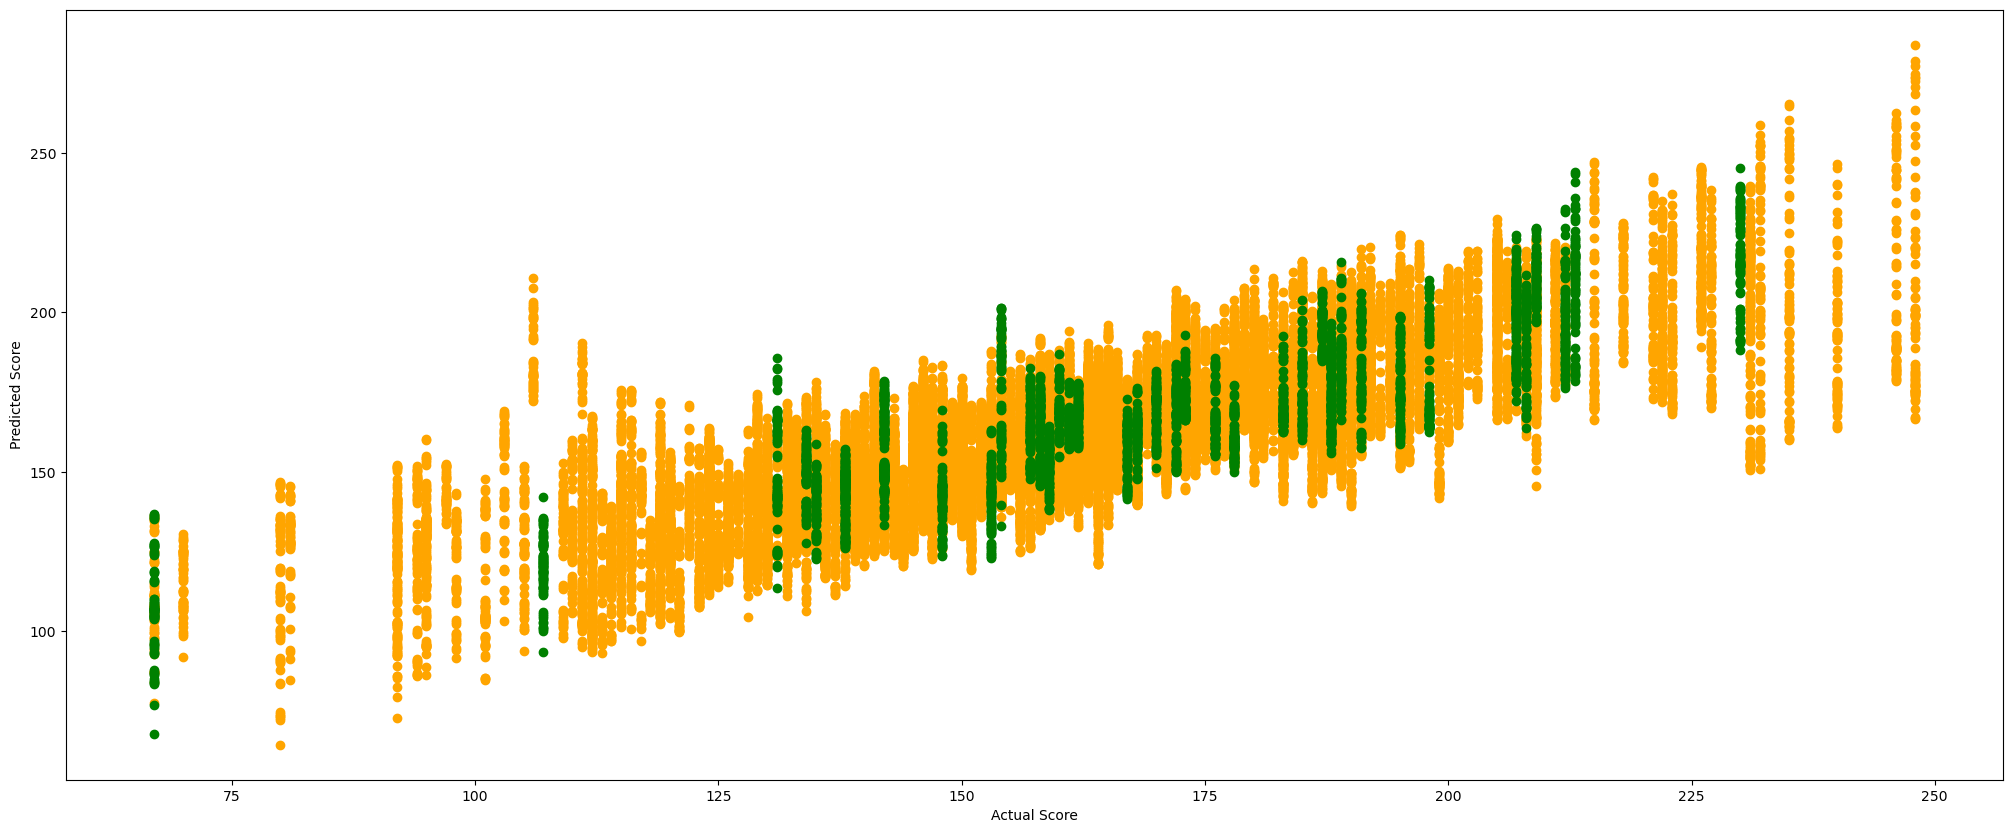

In [64]:
plt.figure(figsize = (25, 10))
plt.scatter(y_train, y_pred_train, color = 'orange')
plt.scatter(y_test, pred, color = 'green')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.show()

**Accuracy of linear regression**

In [65]:
score1 = r2_score(y_test, pred)

In [66]:
print("The accuracy of our Linear Regression model is {}%".format(round(score1, 4) *100))

The accuracy of our Linear Regression model is 72.16%


In [67]:
# from sklearn.metrics import r2_score
# score1 = r2_score(result1["actual_value"], result1["prediction1"])
# print("The accuracy of our Linear Regression model is {}%".format(round(score1, 4) *100))

In [68]:
# score1

In [69]:
# Creating a pickle file for the classifier
filename = 'ipl-first-innings-score-prediction-model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

# Ridge Refression

In [70]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [71]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\sachin kumar ray\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.43483e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\sachin kumar ray\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.4416e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\sachin kumar ray\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.34346e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\sachin kumar ray\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.45125e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\sachin kumar ray\anaconda3\lib\s

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [72]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-328.65931292513926


In [73]:
prediction2=ridge_regressor.predict(X_test)

In [74]:
prediction2

array([172.21538629, 175.38525289, 174.75053841, ..., 100.85862453,
       100.20958678,  93.64881386])

In [75]:
prediction2 = pd.DataFrame(prediction2)

In [76]:
prediction2

,0
0,172.215386
1,175.385253
2,174.750538
3,177.920405
4,181.083110
...,...
3875,101.166166
3876,101.486177
3877,100.858625
3878,100.209587


**Concatenate actual_value and prediction2**

In [77]:
frame2 = [actual_value, prediction2]

In [78]:
result2 = pd.concat(frame2, axis=1, join='inner')

In [79]:
result2.columns = ['actual_value', 'prediction2']

In [80]:
result2

,actual_value,prediction2
0,207,172.215386
1,207,175.385253
2,207,174.750538
3,207,177.920405
4,207,181.083110
...,...,...
3875,107,101.166166
3876,107,101.486177
3877,107,100.858625
3878,107,100.209587


In [81]:
ridge_regressor.predict(X_test)[69]

200.2563136470916

In [82]:
# import seaborn as sns
# sns.distplot(y_test-prediction2)

In [83]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction2))
print('MSE:', metrics.mean_squared_error(y_test, prediction2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction2)))

MAE: 12.298881515325943
MSE: 257.11140659583253
RMSE: 16.034693841661976


**Accuracy of Ridge Regression**

In [84]:
from sklearn.metrics import r2_score
score2 = r2_score(result2["actual_value"], result2["prediction2"])
print("The accuracy of our Ridge Regression model is {}%".format(round(score2, 4) *100))

The accuracy of our Ridge Regression model is 72.2%


In [85]:
score2

0.722032181705236

# Lasso Regression

In [86]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [87]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\sachin kumar ray\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.788e+06, tolerance: 2.647e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\sachin kumar ray\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.632e+06, tolerance: 2.608e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\sachin kumar ray\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

{'alpha': 1}
-321.7584659923037


In [88]:
prediction3=lasso_regressor.predict(X_test)

In [89]:
prediction3

array([170.87637489, 174.29122344, 173.47838988, ..., 106.50735785,
       105.44371993,  99.57836569])

In [90]:
prediction3 = pd.DataFrame(prediction3)

In [91]:
prediction3

,0
0,170.876375
1,174.291223
2,173.478390
3,176.893238
4,180.182685
...,...
3875,106.888001
3876,107.194789
3877,106.507358
3878,105.443720


**Concatenate actual_value and prediction3**

In [92]:
frame3 = [actual_value, prediction3]

In [93]:
result3 = pd.concat(frame3, axis=1, join='inner')

In [94]:
result3.columns = ['actual_value', 'prediction3']

In [95]:
result3

,actual_value,prediction3
0,207,170.876375
1,207,174.291223
2,207,173.478390
3,207,176.893238
4,207,180.182685
...,...,...
3875,107,106.888001
3876,107,107.194789
3877,107,106.507358
3878,107,105.443720


In [96]:
lasso_regressor.predict(X_test)[250]

170.64262687974497

In [97]:
y_test

array([207, 207, 207, ..., 107, 107, 107], dtype=int64)

In [98]:
# import seaborn as sns
# sns.distplot(y_test-prediction3)

In [99]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction3))
print('MSE:', metrics.mean_squared_error(y_test, prediction3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction3)))

MAE: 12.346651664171699
MSE: 263.73897753355544
RMSE: 16.240042411692016


**Accuracy of Lasso Regression**

In [100]:
from sklearn.metrics import r2_score
score3 = r2_score(result3["actual_value"], result3["prediction3"])
print("The accuracy of our Lasso Regression model is {}%".format(round(score3, 4) *100))

The accuracy of our Lasso Regression model is 71.49%


In [101]:
score3

0.7148669942149409